In [ ]:
#####################################################################
### Jupyter notebook should run at the root path of this project  ###
#####################################################################

In [2]:
import pandas as pd
import numpy as np
import platform as pf
import os
import xlrd

In [3]:
from matplotlib import pyplot as ppl
from sklearn import preprocessing as pprs
from scipy import stats
from datetime import datetime

In [4]:
pd.set_option("max_row",1000)
pd.set_option("max_column",10)

In [ ]:
########################################################################################################
## Notice that file CrudeOil_WTI_macrotrends.csv has different header. Header name should be modified ##
## Change "value" to "Close/Last"                                                                     ##
########################################################################################################

<IPython.core.display.Javascript object>


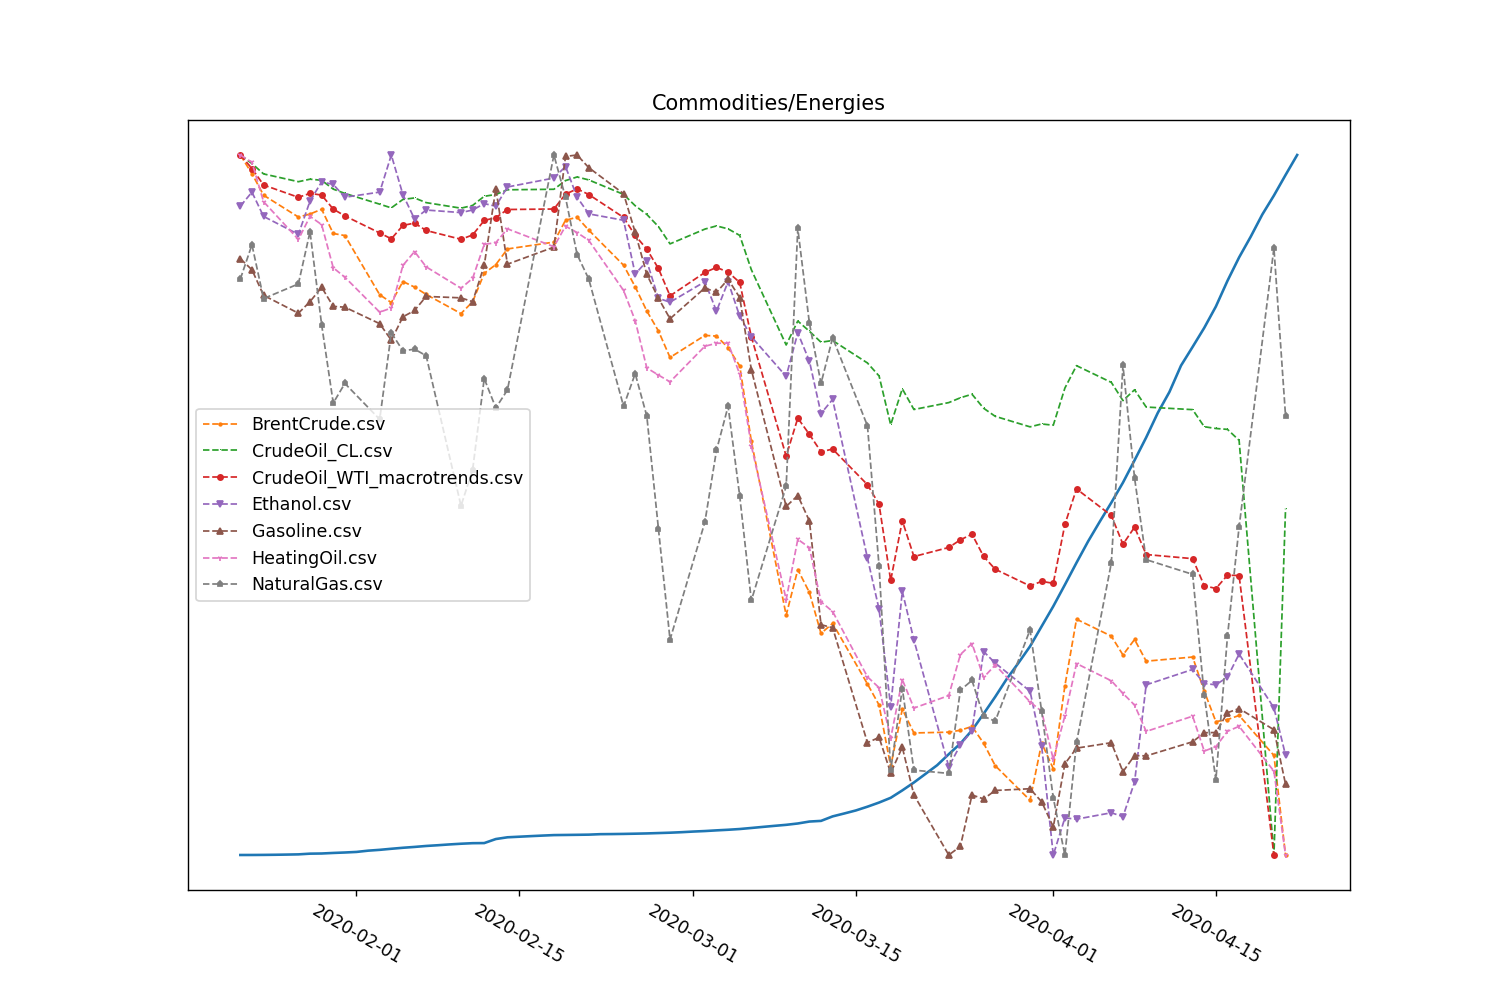

directory 'result' created


<IPython.core.display.Javascript object>


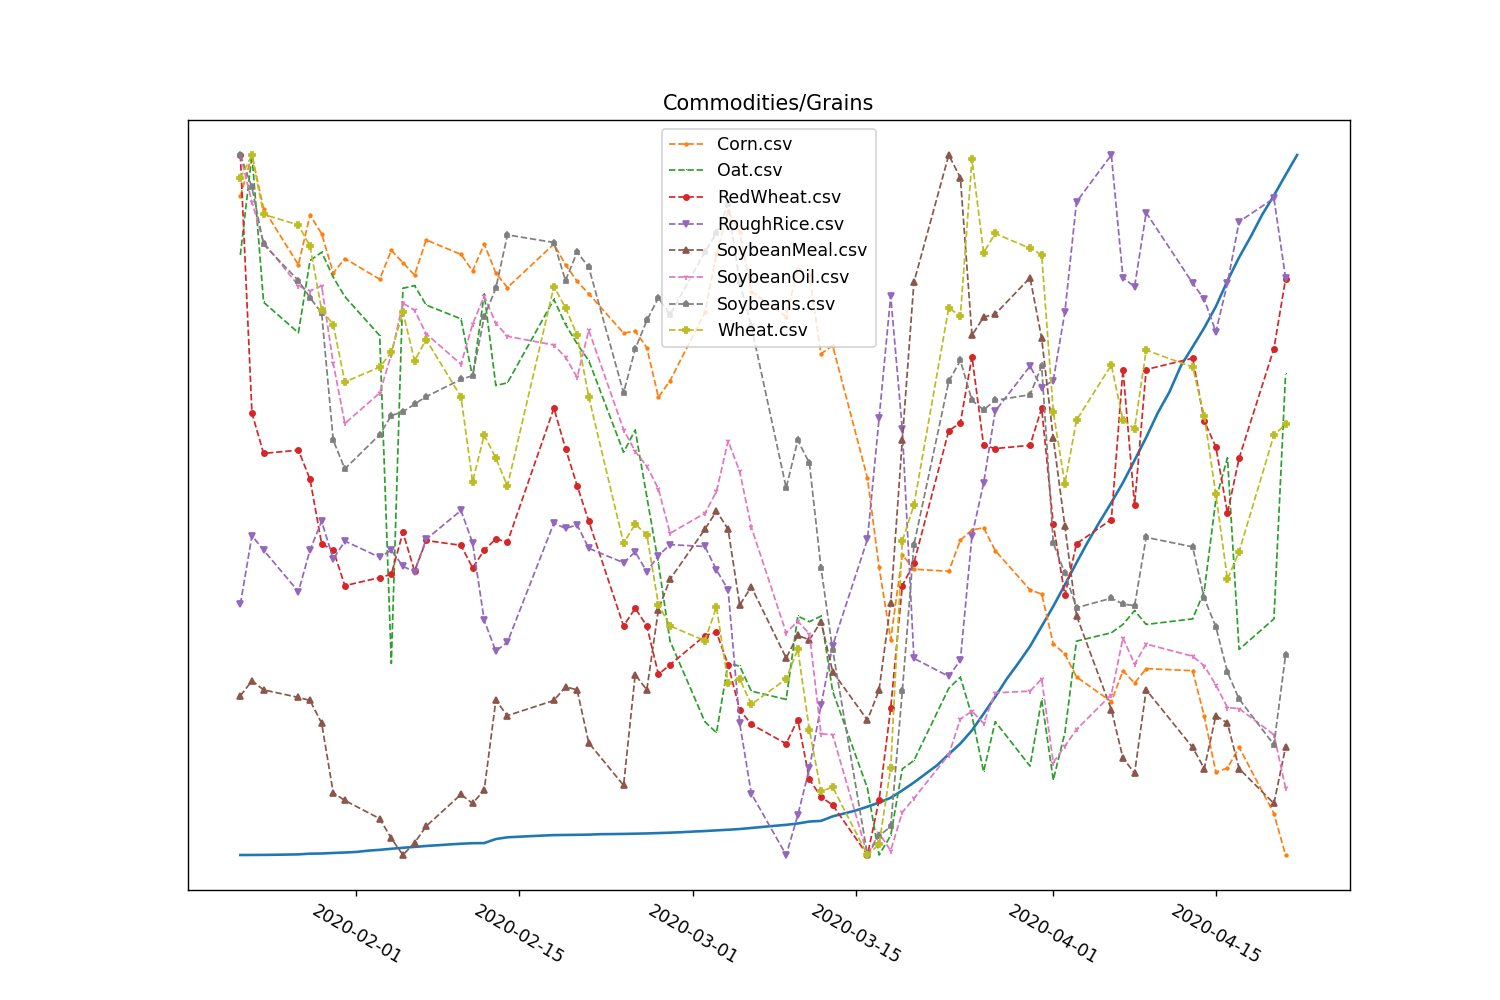

<IPython.core.display.Javascript object>


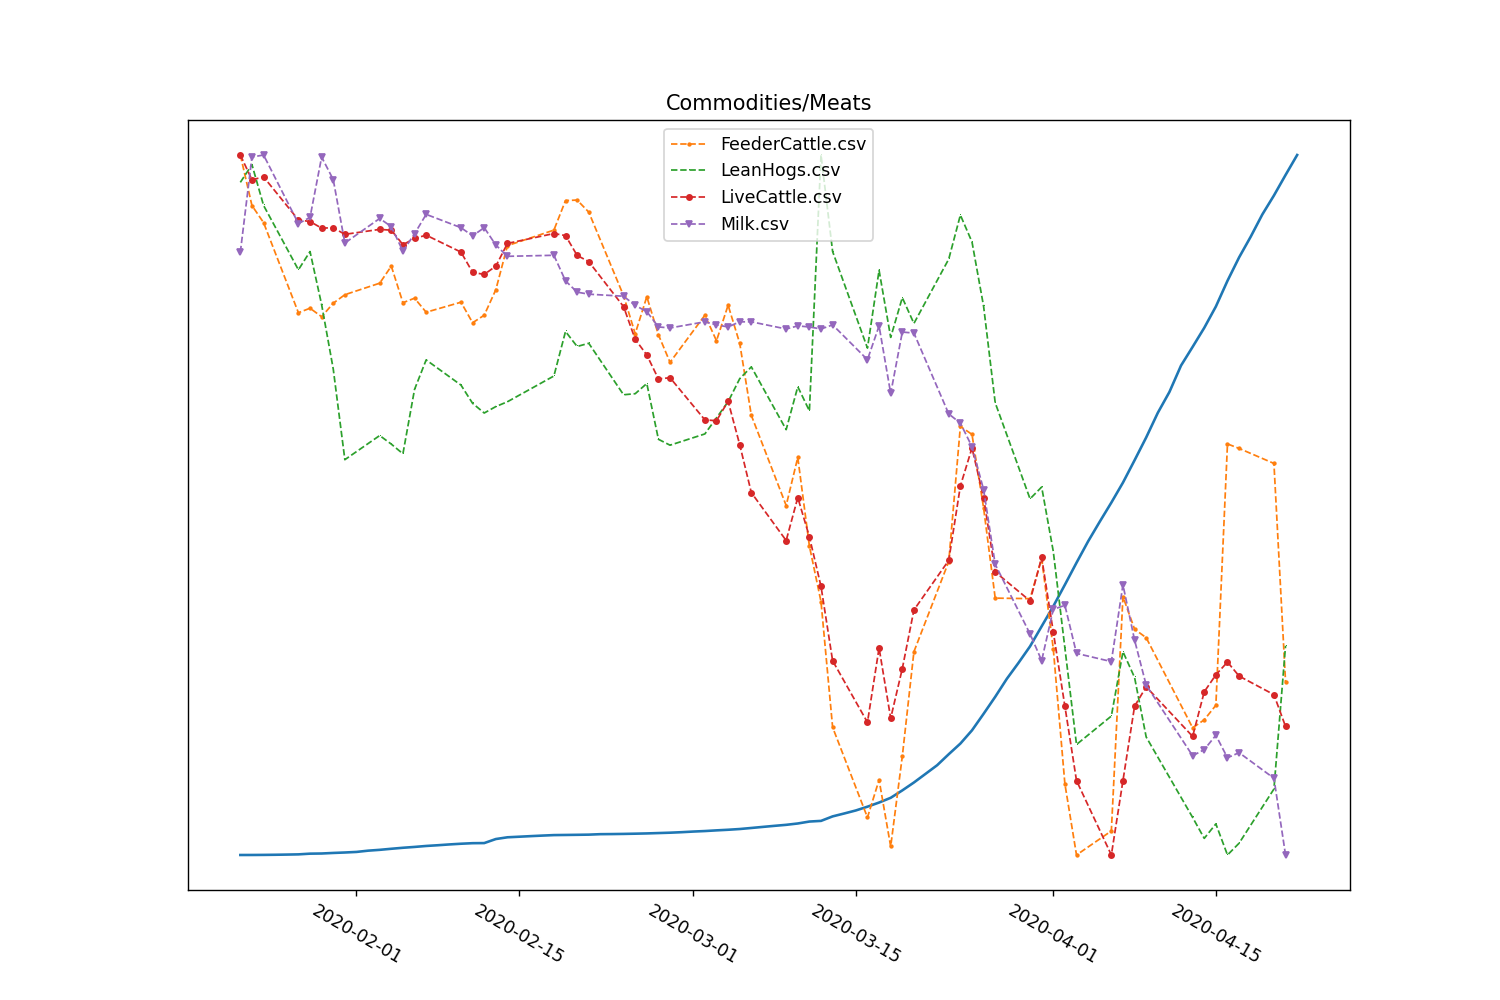

<IPython.core.display.Javascript object>


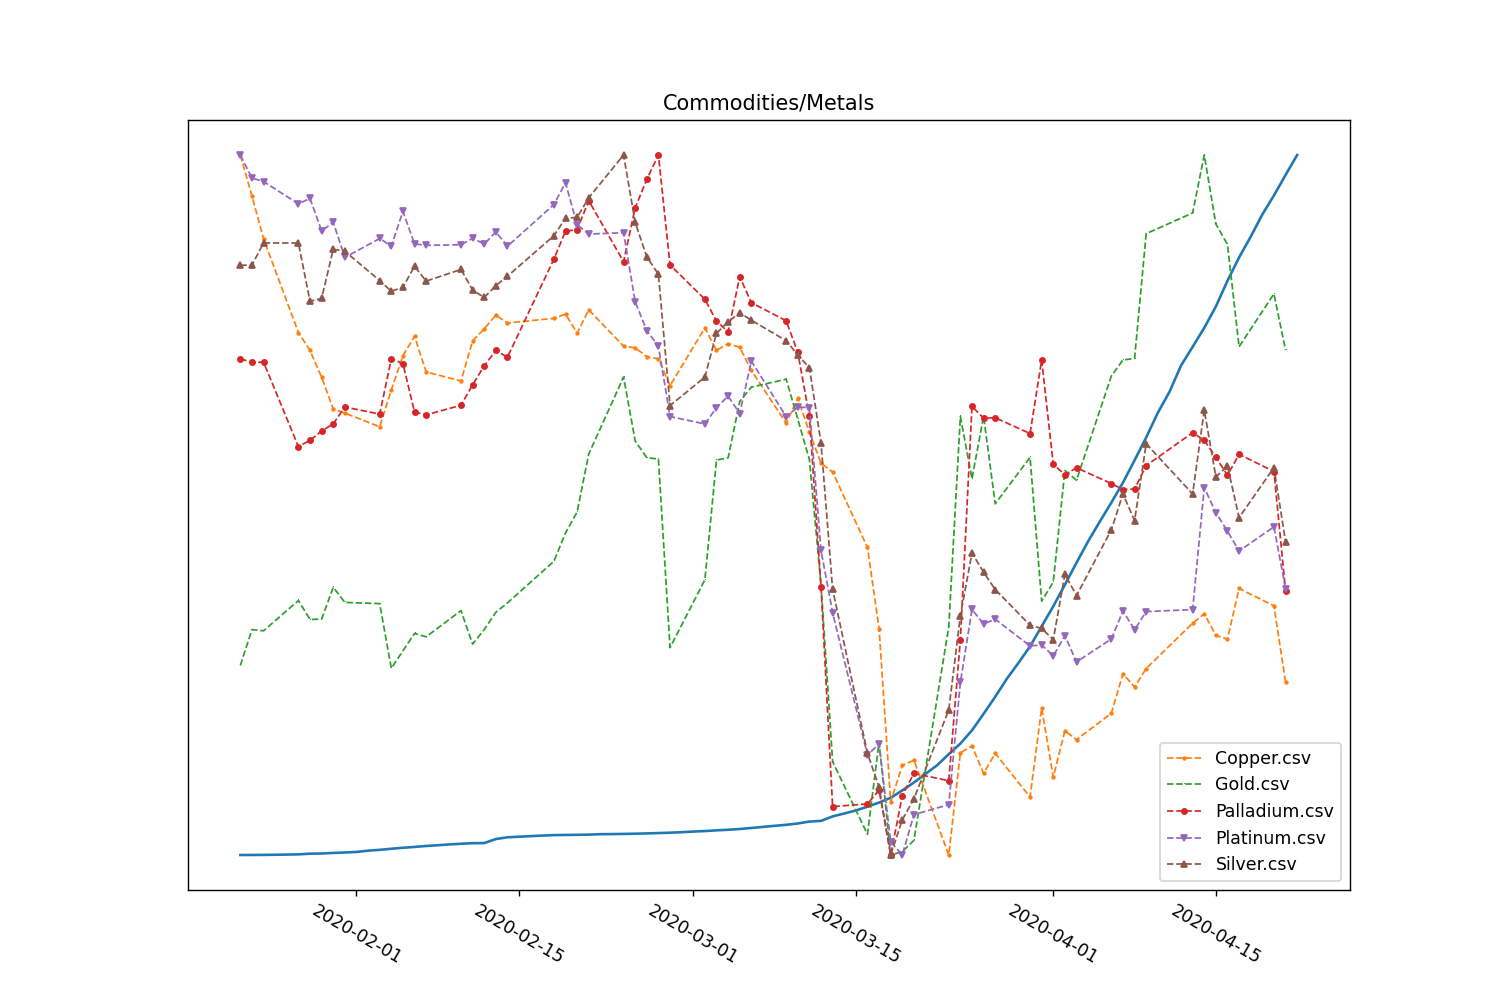

<IPython.core.display.Javascript object>


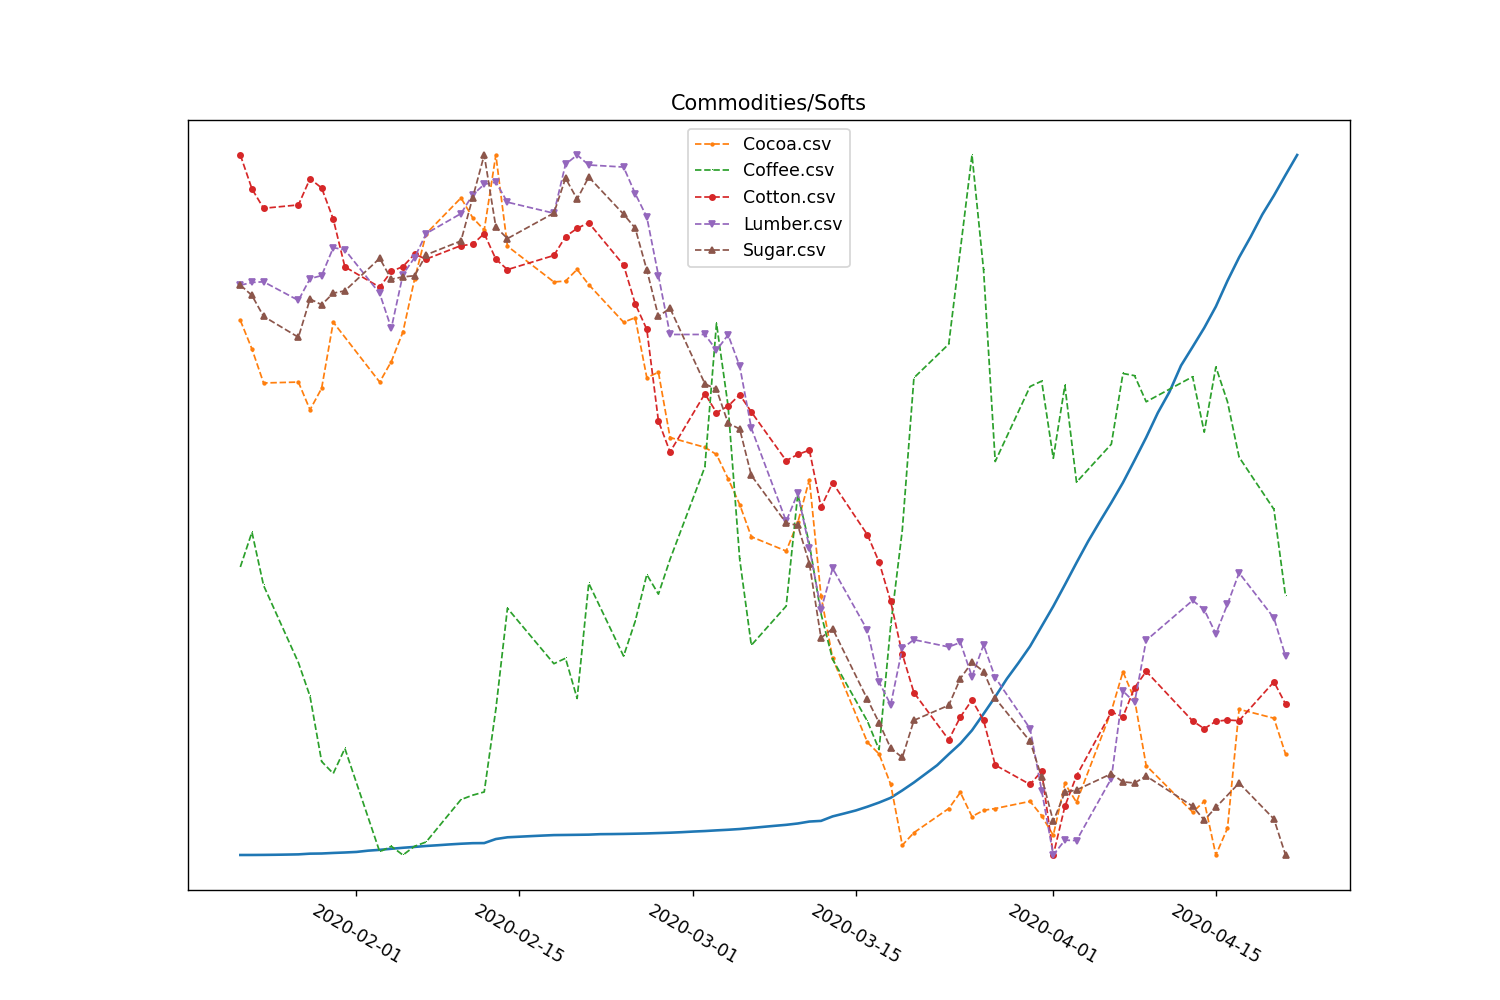

<IPython.core.display.Javascript object>


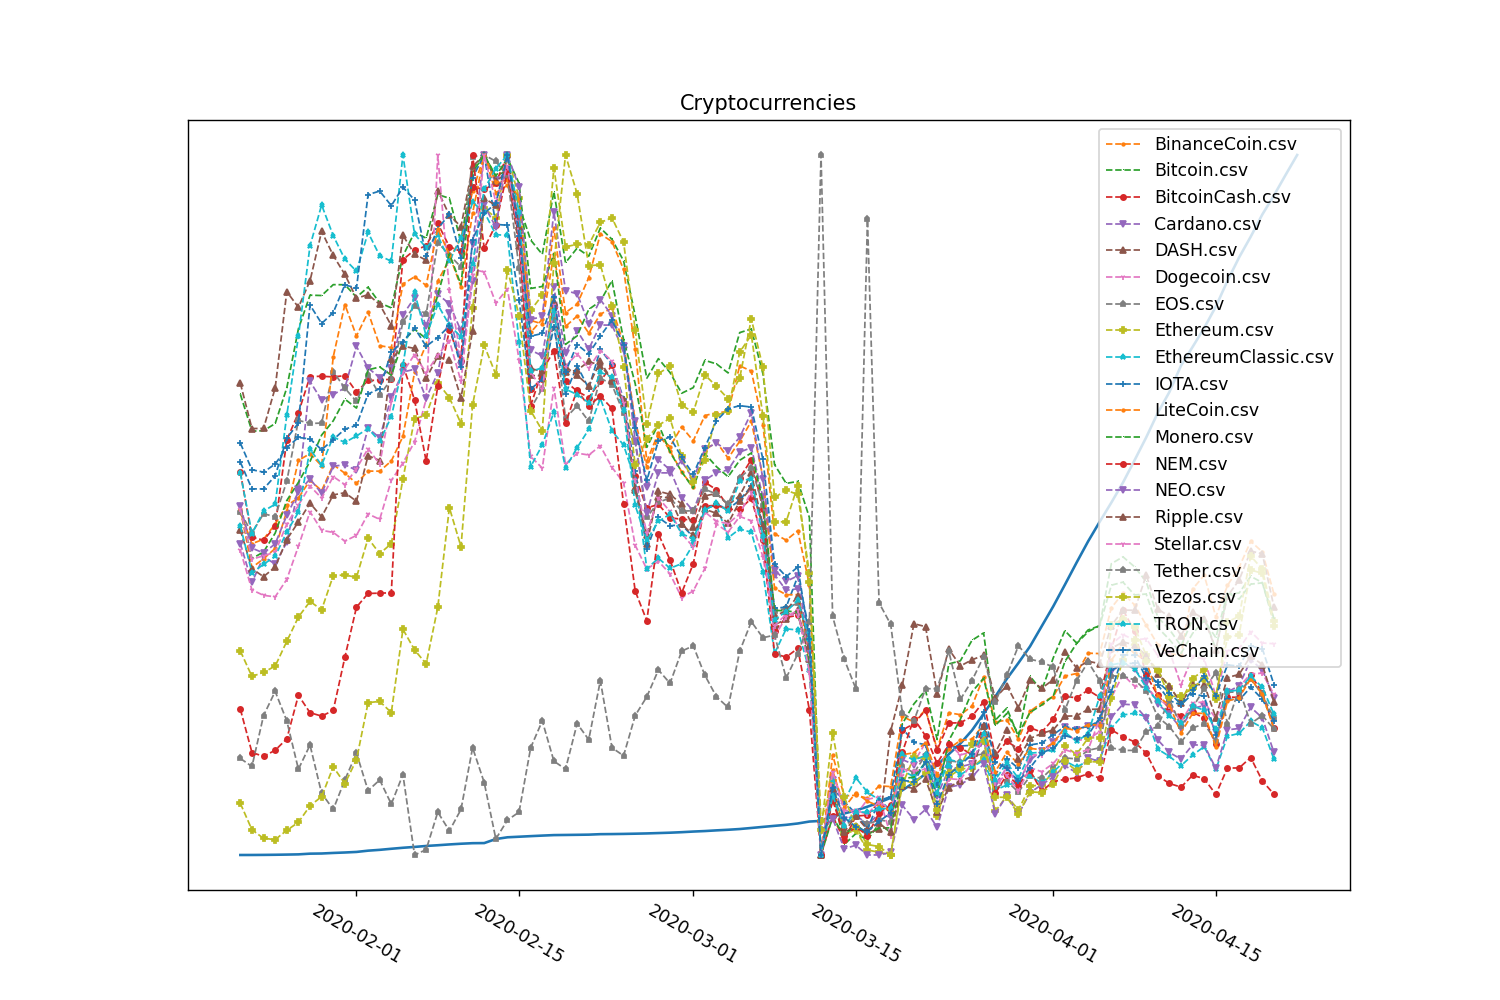

<IPython.core.display.Javascript object>


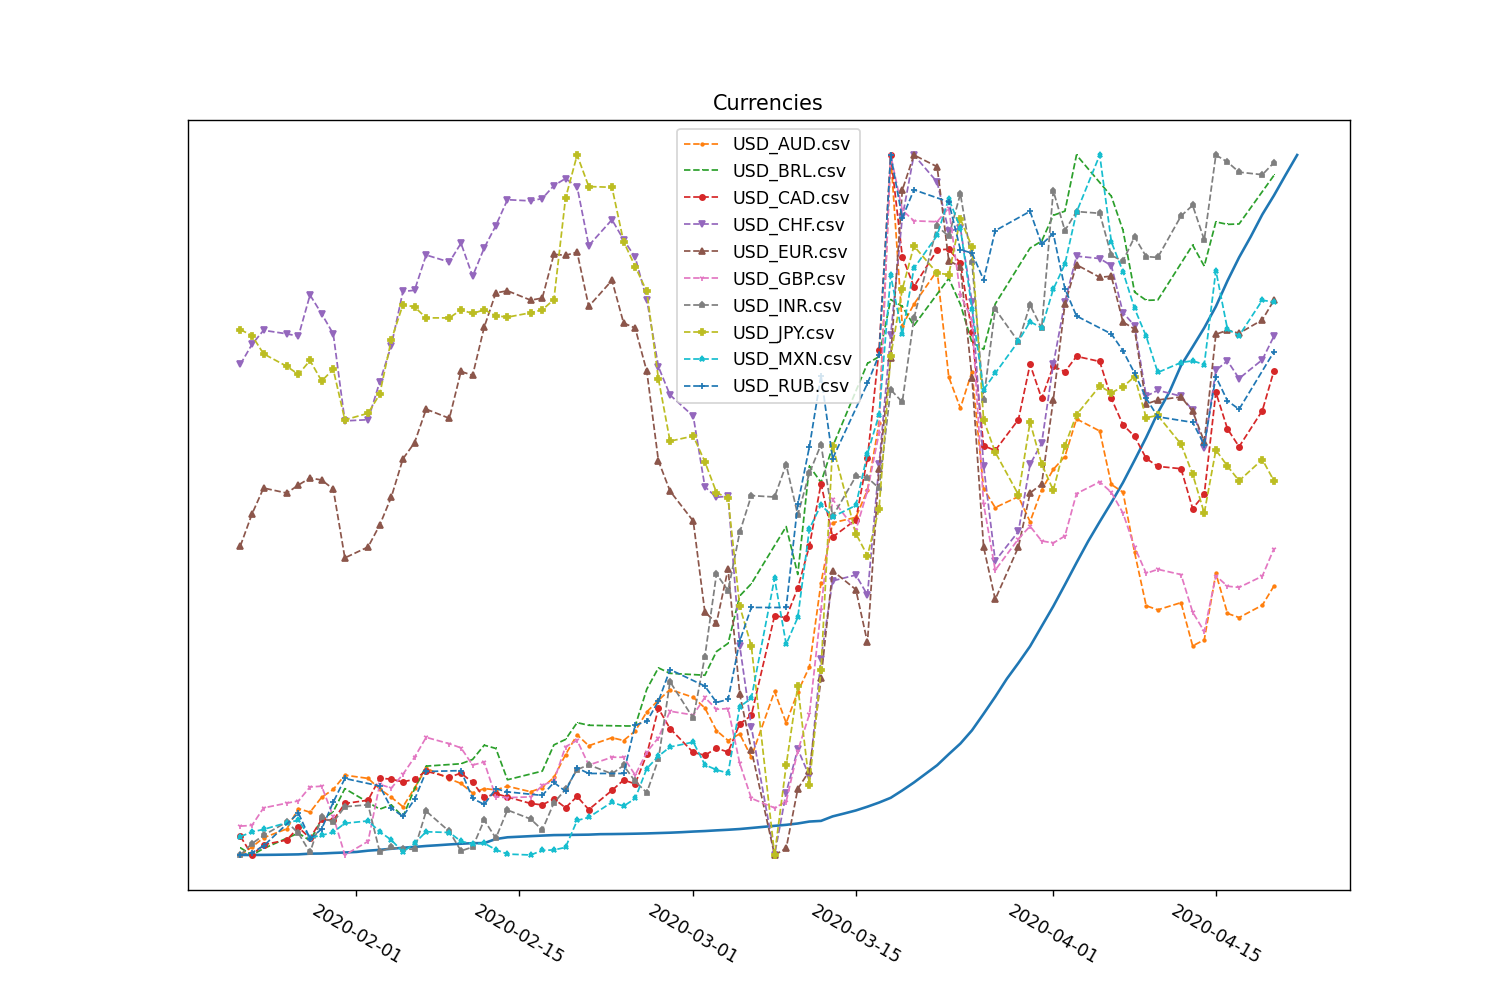

<IPython.core.display.Javascript object>


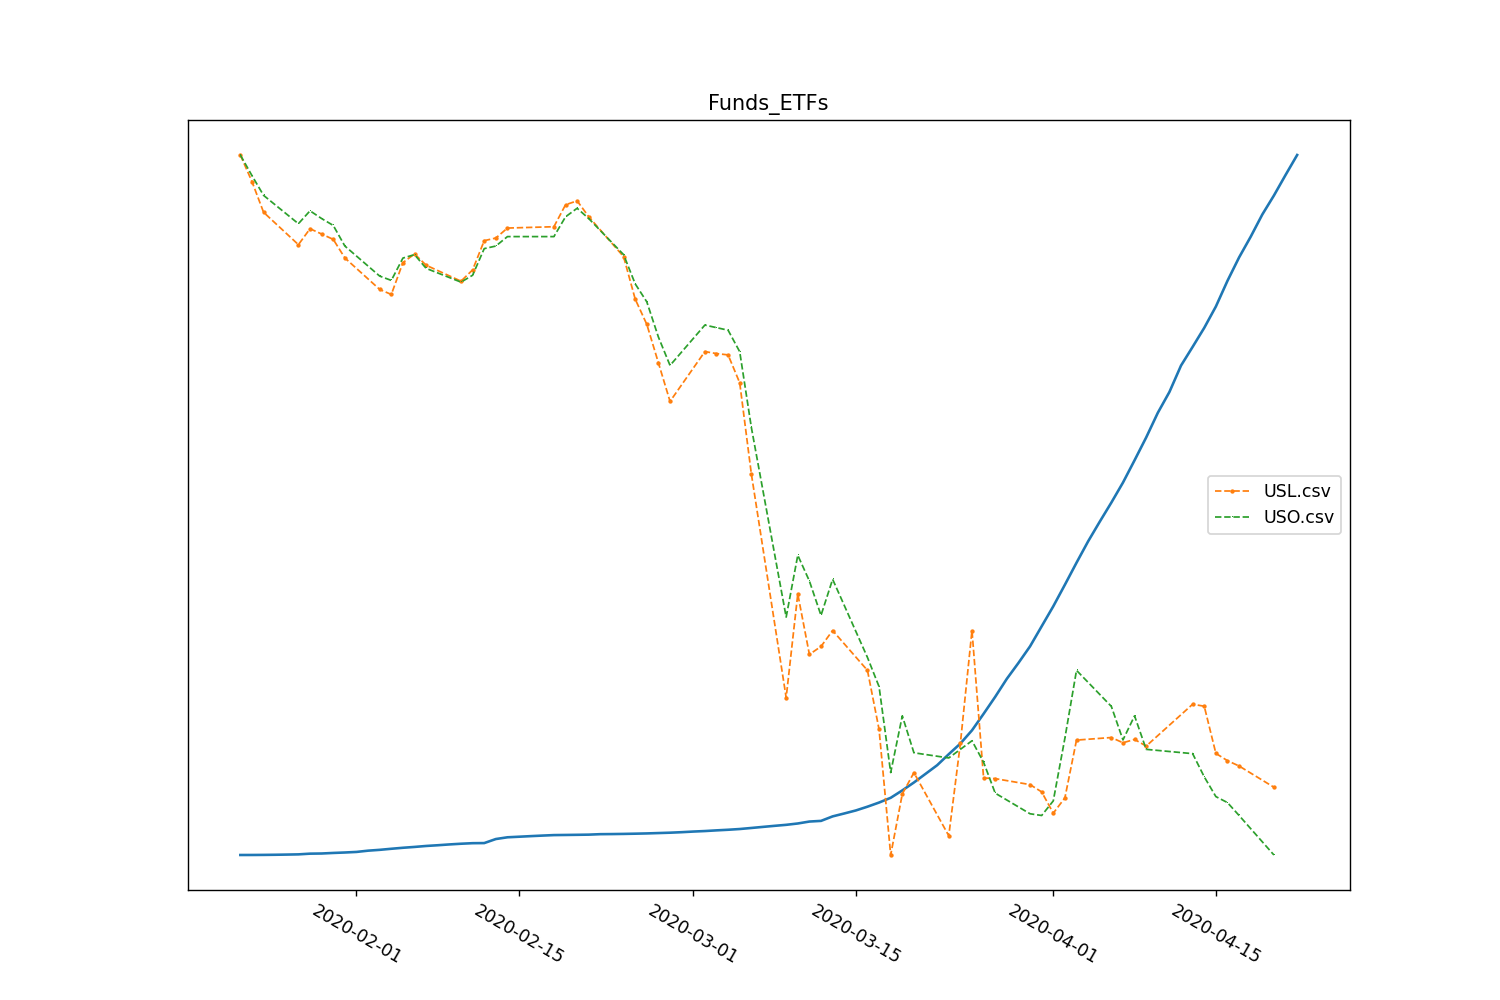

<IPython.core.display.Javascript object>


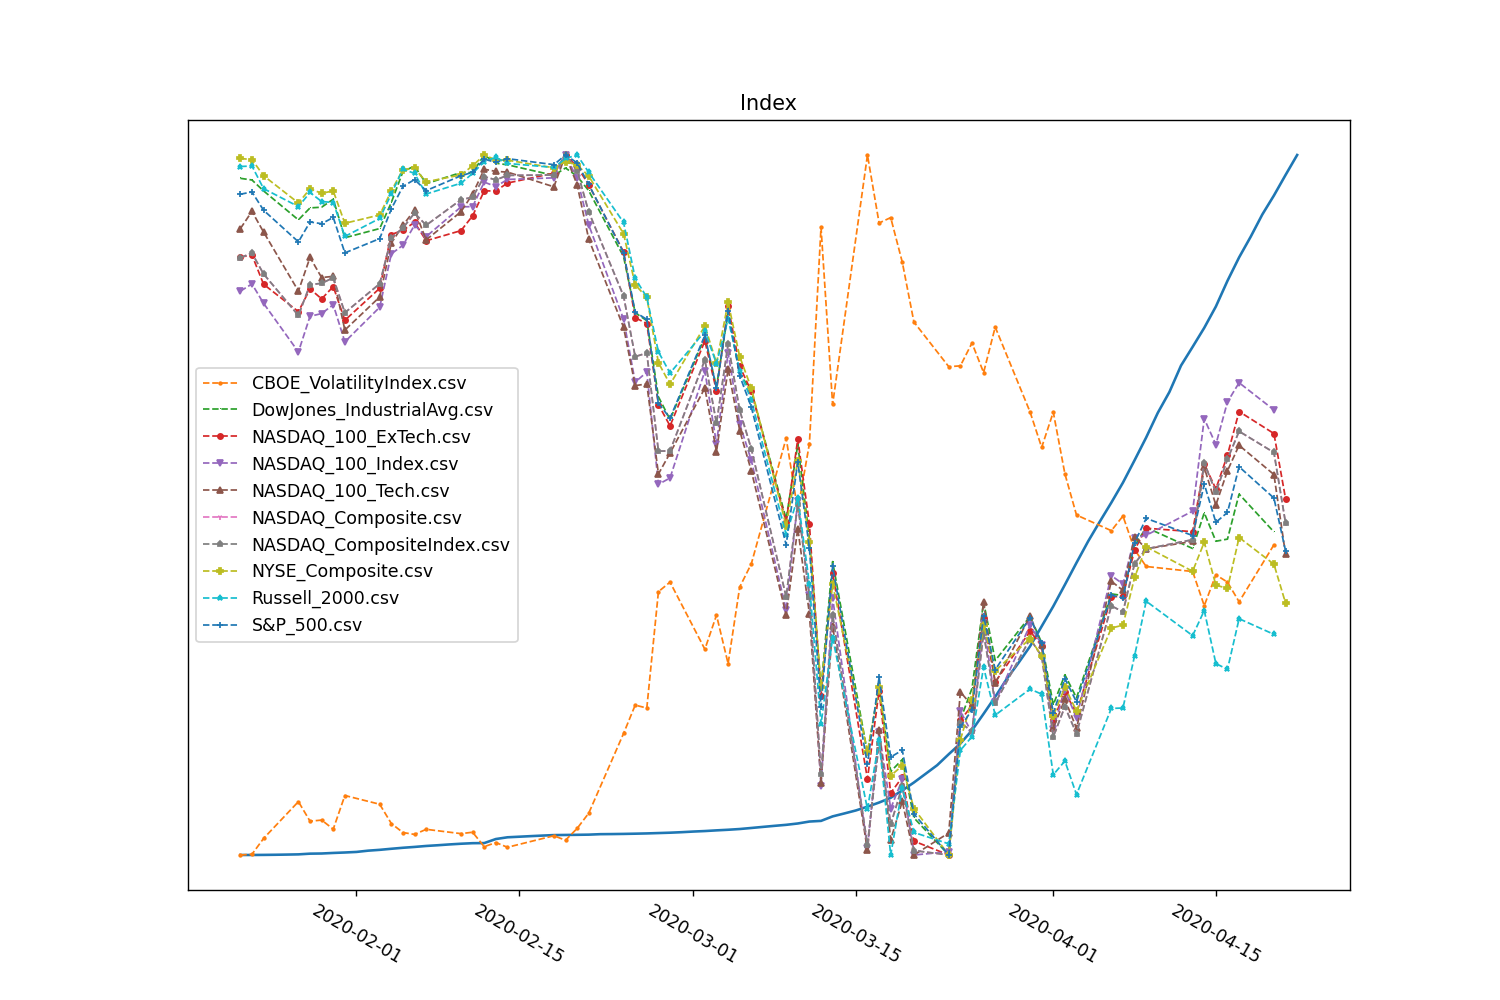

In [7]:
def PlotCovidData(plotCountries, covidDF, date):
    if plotCountries:
        countries = ["US", "China", "Japan", "Germany", "India", "France", "United Kingdom", "Italy", "Brazil", "Canada", "World"]
    else:
        countries = ["World"]
    for country in countries:
        confirmed = covidDF[country].values
        confirmed = confirmed.reshape(-1,1)
        minmax_scaler = pprs.MinMaxScaler()
        fit_confirmed = minmax_scaler.fit_transform(confirmed)
        if country == "World":
            ppl.plot(date, fit_confirmed)
        else:
            ppl.plot(date, fit_confirmed, linewidth = 0.5, linestyle = "--", label = country)
    
# This function plot the changing curve of covid confirmed cases. Then it plot data of index, commodities.....
# These plots are just for observing the trends of these indicators, they will all be scaled into range [0,1],
# so there's nothing to do with actual number, just the trend.

# By default, the plot will not show covid data of every country. If needed, change the value of variable "plotCountries"
# to True and run, then the plots will show data of confirmed cases of countries that rank top 10 in GDP of 2019. 

########################################################################
### Other than showing in this tab, the result will also be saved    ###
### as png files under directory "result"                            ###
########################################################################

def PlotIndexAndOthers():
    plotCountries = False 
    minmax_scaler = pprs.MinMaxScaler()
    covidDP = "data/covid-19/time_series_covid19_confirmed_global_modified.csv"
    # covidDP_deaths = "data/covid-19/time_series_covid19_deaths_global_modified.csv"
    directories = ["Commodities/Energies","Commodities/Grains","Commodities/Meats",
                   "Commodities/Metals","Commodities/Softs","Cryptocurrencies","Currencies",
                   "Funds_ETFs","Index"]
    dataFP = "data/market/"
    # Read confirmed data. Data is standardized into [0,1] using MinMaxScaler in order to observe the trend easier
    covidDF = pd.read_csv(covidDP)
    # covidDF_deaths = pd.read_csv(covidDP_deaths)
    covidDF["Date"] = pd.to_datetime(covidDF["Date"])
    date = covidDF["Date"].tolist()
    
    """
    deaths = covidDF_deaths["World"].values
    deaths = deaths.reshape(-1,1)
    minmax_scaler = pprs.MinMaxScaler()
    fit_deaths = minmax_scaler.fit_transform(deaths)
    ppl.plot(date, fit_deaths, linestyle = ":")
    """
    markerStyle = ['.', ',', 'o', 'v', '^', '1', 'p', 'P', '*', '+']
    for directory in directories:
        rootPath = dataFP + directory
        ppl.figure(figsize=(12, 8))
        PlotCovidData(plotCountries, covidDF, date)
        ppl.title(directory)
        plotNumber = 0
        for root, dirs, files in os.walk(rootPath):
            for file in files:
                path = os.path.join(root, file)
                if path.endswith('.csv'):
                    indicatorData = pd.read_csv(path)
                    indicatorData["Date"] = pd.to_datetime(indicatorData["Date"])
                    indicatorData.sort_values('Date', inplace=True, ascending=True)
                    # Only keep data within the range of the covid data
                    indicatorData = indicatorData[(indicatorData["Date"] >= date[0]) & (indicatorData["Date"] <= date[-1])]
                    indicatorData = indicatorData[["Date", "Close/Last"]]
                    #print(indexData)
                    indicatorDate = indicatorData["Date"].tolist()
                    indicatorValue = indicatorData["Close/Last"].values
                    indicatorValue = indicatorValue.reshape(-1,1)
                    fit_indicatorValue = minmax_scaler.fit_transform(indicatorValue)
                    ppl.plot(indicatorDate, fit_indicatorValue, label=file, linewidth = 1, linestyle = "--", marker = markerStyle[plotNumber % 10], markersize = 3)
                    ppl.xticks(rotation = -30)
                    ppl.yticks([])
                    ppl.legend()
                    plotNumber = plotNumber + 1
        directory = directory.replace("/", "_")
        # If not exist, create folder 'result'
        if not os.path.exists("result"):
            os.makedirs("result")
            print("directory 'result' created")
        picName = "./result/" + directory + ".png"
        ppl.savefig(picName)
    ppl.show()
%matplotlib notebook
PlotIndexAndOthers()

In [127]:
# From the plot above we notice that the behavior of all indexes varied before and after time period of around March 20, the time when they
# dropped to their lowest. We can assume that no valuable conclusions will be drawn if we calculate the correlation between these indexes
# and confirmed data.

# Same situation shown in stock data (most of them). Thus, March 20 seems to be a turning point (if we ignore the latency of the response of stock market)

# What we are trying to do then is to analyze data before and after March 20th seperately. We first calculate the Pearson correlation of the data of these two peroids
# of time with corresponding confirmed data, and hope to observe different behavior between stock of different industry/sector.

# Further more, clustering algorithm (DTW?) might be applied to find different patterns of stock data.

AA
1385068553.0
ARNC
1064048630.0
AXP
67693420113.0
BK
32238979630.0
BMY
139549000000.0
CNP
7916181131.0
DD
29146335454.0
DIS
184624000000.0
DXC
3823569804.0
ETN
32046823958.0
F
19803901768.0
GE
56637000000.0
HAL
6663667474.0
HON
95978802205.0
HPQ
21961176868.0
HRC
7494273437.0
IP
12109795838.0
MATX
1161667332.0
MO
72606440026.0
MRO
3327658189.0
NI
9750774128.0
PNR
5257026952.0
RTX
98527157476.0
TRN
1863128642.0
USB
52103200895.0
WRB
10134049422.0
0 file(s) omitted
result saved to result/result_by_Industry.csv


<IPython.core.display.Javascript object>


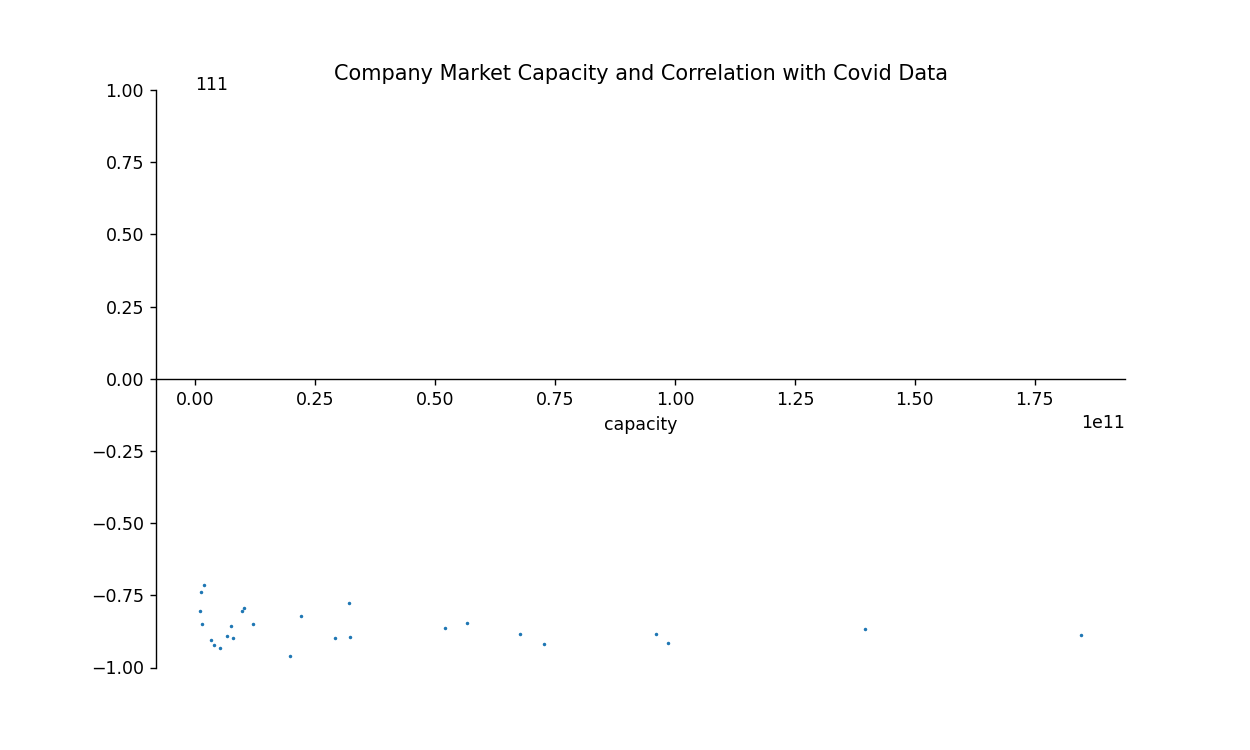

In [32]:
# This function plot the stock data, then calculate Pearson correlation of two period of time
# All stock data to be analyzed should be placed in folder "data/stock-history"
# THIS DIRECTORY SHOULD BE CREATED MANUALLY
# This method may not me accurate enough, since we didn't consider the distribution of the data

# If try to plot the stock data, please change value "plotStock" right below to "True"
# For some unknowned reason, the plot will not display normally in this notebook when there are too many outputs,
# so please check the plot in the result folder when enable plotting

# You can choose analyze stocks in different industries or sectors. Industry is a finer grain standard to classify stocks.
# One sector may include more than one industries
# To change the grain, set value "category" to "Sector" or "Industry"

###############################################################################
### Result will be saved as corresponding csv file under directory "result" ###
###############################################################################

def StockDataTest():
    plotStock = False
    category = "Industry"
    covidDP = "data/covid-19/time_series_covid19_confirmed_global_modified.csv"
    companyDP = "data/market/Stock/company info/companylist.csv"
    companyDF = pd.read_csv(companyDP)
    # Only keep columns for symbol and industry
    companyIndustry = companyDF[["Symbol","MarketCap", category]]
    # Remove duplications
    companyIndustry = companyIndustry.drop_duplicates()
    # companyIndustry = companyIndustry[companyIndustry["Industry"] == ""]
    # This is a dataframe that use the symbol of a stock to fetch its industry
    companyIndustry.set_index("Symbol", inplace = True)
    # This is a dataframe to store the result of each industry
    industryResult = companyDF[[category]]
    industryResult = industryResult.drop_duplicates()
    industryResult['avg_cor1'] = 0.0
    industryResult['avg_cor2'] = 0.0
    industryResult['count'] = 0.0
    industryResult.set_index(category, inplace = True)
    # This two lists are used to store market capacity and correlation result of all companies
    mCap = []
    mCor = []
    mCorABS = []
    # Read confirmed data. 
    covidDF = pd.read_csv(covidDP)
    covidDF["Date"] = pd.to_datetime(covidDF["Date"])
    covidDF = covidDF[["Date", "World"]]
    # Date to seperate
    sepDate = datetime(2020, 3, 20)
    covidLeft = covidDF[covidDF["Date"] <= sepDate]["World"].values
    covidRight = covidDF[covidDF["Date"] >= sepDate]["World"].values
    date = covidDF["Date"].tolist()
    minmax_scaler = pprs.MinMaxScaler()
    if plotStock:
        ppl.figure(figsize=(12, 8))
        ppl.title("stock history")
    rootPath = "data/stock-history2"
    omittedFileCount = 0
    for root, dirs, files in os.walk(rootPath):
        for file in files:
            path = os.path.join(root, file)
            if path.endswith('.csv'):
                stockData = pd.read_csv(path)
                stockData["date"] = pd.to_datetime(stockData["date"])
                stockData.sort_values('date', inplace=True, ascending=True)
                # Only keep data within the range of the covid data
                stockData = stockData[(stockData["date"] >= date[0]) & (stockData["date"] <= date[-1])]
                stockData = stockData[["date", "close"]]
                stockDate = stockData["date"].tolist()
                stockValue = stockData["close"].values
                # Here we ignore those stocks that have only very few data or too many missing data points
                # We ignore stock data that has 60% missing points or higher, this number should be consider carefully
                if len(stockValue) < 0.5 * len(date):
                    # print("stock data %s (length = %d) omitted" % (file, len(stockValue)))
                    omittedFileCount += 1
                    continue
                # Fill empty values in missing date. We use average value of nearest valid data point
                i = 0
                for j in range(0, len(date)):
                    if i >= len(stockDate):
                        newLine = pd.DataFrame({"date":date[j], "close":stockValue[i - 1]}, index = [0])
                        stockData = stockData.append(newLine, ignore_index = True)
                    elif stockDate[i] > date[j]:
                        if i == 0:
                            newLine = pd.DataFrame({"date":date[j], "close":stockValue[i]}, index = [0])
                        else:
                            insertValue = (stockValue[i] + stockValue[i - 1]) / 2
                            newLine = pd.DataFrame({"date":date[j], "close":insertValue}, index = [0])
                        stockData = stockData.append(newLine, ignore_index = True)
                    else:
                        i += 1
                stockData.sort_values('date', inplace=True, ascending=True)
                if plotStock:
                    stockValue = stockData["close"].values
                    stockValue = stockValue.reshape(-1,1)
                    fit_stockValue = minmax_scaler.fit_transform(stockValue)
                    # Plot data
                    ppl.plot(date, fit_stockValue, linewidth = 0.5, linestyle = "--")
                # Devide data into two period
                leftStock = stockData[stockData["date"] <= sepDate]["close"].values
                rightStock = stockData[stockData["date"] >= sepDate]["close"].values
                pr1, p1 = stats.pearsonr(covidLeft, leftStock)
                pr2, p2 = stats.pearsonr(covidRight, rightStock)
                # Fetch industry using the symbol
                symbol = file.split(".")[0]
                # Ignore companies that are not in the company info file
                if symbol not in companyIndustry.index:
                    # print("Symbol %s not exist, data omitted" % symbol)
                    omittedFileCount += 1
                    continue
                # Store the capacity and correlation result for plotting
                print(symbol)
                cap = companyIndustry.loc[symbol, "MarketCap"]
                print(cap)
                if cap > 0 or cap is np.nan:
                    mCap.append(cap)
                    mCor.append(pr1)
                    mCorABS.append(abs(pr1))
                # Fetch category using symbol
                industryName = companyIndustry.loc[symbol].values[1]
                if industryName is np.nan:
                    # print("Symbol %s not classified, data omitted" % symbol)
                    omittedFileCount += 1
                    continue
                industryResult.loc[industryName, "avg_cor1"] += pr1
                industryResult.loc[industryName, "avg_cor2"] += pr2
                industryResult.loc[industryName, "count"] += 1
                # result for each company
                # print("pr1: %f pr2: %f, %s, %s" % (pr1, pr2, symbol, companyIndustry.loc[symbol].values[1]))
    # calcuate the average value
    industryResult["avg_cor1"] /= industryResult["count"]
    industryResult["avg_cor2"] /= industryResult["count"]
    print("%d file(s) omitted" % omittedFileCount)
    if not os.path.exists("result"):
        os.makedirs("result")
        print("directory 'result' created")
    print("result saved to result/result_by_%s.csv" % category)
    industryResult.dropna(how = "any", inplace = True)
    # Industries without counted stocks will be removed
    industryResult = industryResult[industryResult["count"] > 0]
    resultPath = "result/result_by_" + category + ".csv"
    industryResult.to_csv(resultPath, index=True, header=False)
    %matplotlib notebook
    if plotStock:
        ppl.xticks(rotation = -30)
        ppl.yticks([])
        ppl.savefig("result/stockPlot.png")
        # ppl.show()
    # plot for market capacity and correlation
    ppl.figure(figsize=(10, 6))
    ppl.title("Company Market Capacity and Correlation with Covid Data")
    ax=ppl.gca()
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.spines['bottom'].set_position(('data',0))
    ppl.ylim((-1, 1))
    ppl.xlabel("capacity")
    ppl.scatter(mCap, mCor, s = 1)
    pc, px = stats.pearsonr(mCap, mCorABS)
    pc = 111
    ppl.text(1,1, "%d" % pc, fontsize=10)
    ppl.savefig("result/Capacity&Correlation.png")
    ppl.show()
    
StockDataTest()